In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Here we have to import the required libraries

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


Need to read the csv file on which dataset we have to work on

In [5]:
df = df.rename(columns={'1': 'Id_number', '1.52101': 'RI_refractive index', '13.64': 'Na_Sodium', '4.49': 'Mg_Magnesium', '1.10':'Al_Aluminum', '71.78':'Si_Silicon', '0.06': 'K_Potassium','8.75': 'Ca_Calcium', '0.00': 'Ba_Barium', '0.00.1': 'Fe_Iron', '1.1': 'Type of glass'})
print(df)

     Id_number  RI_refractive index  Na_Sodium  Mg_Magnesium  Al_Aluminum  \
0            2              1.51761      13.89          3.60         1.36   
1            3              1.51618      13.53          3.55         1.54   
2            4              1.51766      13.21          3.69         1.29   
3            5              1.51742      13.27          3.62         1.24   
4            6              1.51596      12.79          3.61         1.62   
..         ...                  ...        ...           ...          ...   
208        210              1.51623      14.14          0.00         2.88   
209        211              1.51685      14.92          0.00         1.99   
210        212              1.52065      14.36          0.00         2.02   
211        213              1.51651      14.38          0.00         1.94   
212        214              1.51711      14.23          0.00         2.08   

     Si_Silicon  K_Potassium  Ca_Calcium  Ba_Barium  Fe_Iron  Type of glass

Here we need to provide the header for all the columns along with the correct name by using rename method

In [6]:
df.shape

(213, 11)

In this dataset there are 213 rows and 11 columns

In [7]:
df.describe()

,Id_number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Here we will decribe the dataset

In [8]:
df.isnull().sum()

Id_number              0
RI_refractive index    0
Na_Sodium              0
Mg_Magnesium           0
Al_Aluminum            0
Si_Silicon             0
K_Potassium            0
Ca_Calcium             0
Ba_Barium              0
Fe_Iron                0
Type of glass          0
dtype: int64

Here we need to check the null values available in our dataset, as per this we can verify that there are no null values present so we can further proceed with the process

In [9]:
df.head()

,Id_number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


By using df.head we can verify the data from upward direction

In [10]:
df.tail()

,Id_number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type of glass
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


By using df.tail we can check the dataset from the bottom

In [11]:
df.describe()

,Id_number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  []


Numerical Columns:  ['Id_number', 'RI_refractive index', 'Na_Sodium', 'Mg_Magnesium', 'Al_Aluminum', 'Si_Silicon', 'K_Potassium', 'Ca_Calcium', 'Ba_Barium', 'Fe_Iron', 'Type of glass']


We have classify the dataset into categorical colums and numerical columns, here we can verify that no categorical data is present in out dataset.

<AxesSubplot:>

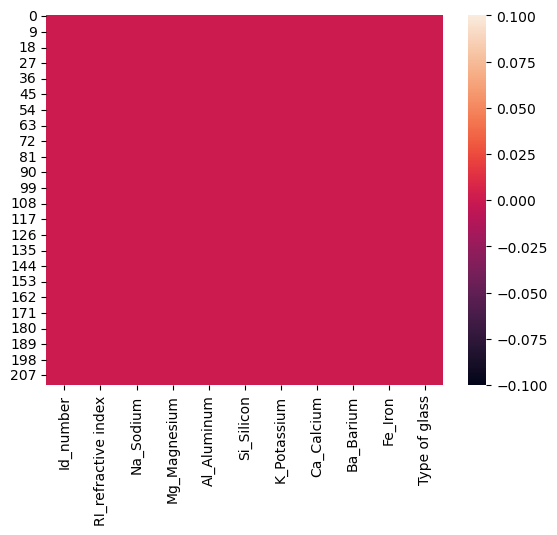

In [13]:
sns.heatmap(df.isnull())

By using the headmap we are verifying the null values in the dataset.

In [14]:
df.skew()

Id_number              0.000000
RI_refractive index    1.639658
Na_Sodium              0.457318
Mg_Magnesium          -1.154323
Al_Aluminum            0.900017
Si_Silicon            -0.744546
K_Potassium            6.549276
Ca_Calcium             2.040591
Ba_Barium              3.406749
Fe_Iron                1.747173
Type of glass          1.108861
dtype: float64

By using df.skew we will check the skewness of the dataset, from this we can verify that our data is skewed for K_Potassium, Ca_Calcium, Ba_Barium and Fe_Iron

In [15]:
df['K_Potassium'] = np.cbrt(df['K_Potassium'])
df['Ca_Calcium'] = np.cbrt(df['Ca_Calcium'])
df['Ba_Barium'] = np.cbrt(df['Ba_Barium'])
df['Fe_Iron'] = np.cbrt(df['Fe_Iron'])
df['Type of glass'] = np.cbrt(df['Type of glass'])

We are trying to reduce the skewness in the dataset so that data would be nore clear than previous

In [16]:
df.skew()

Id_number              0.000000
RI_refractive index    1.639658
Na_Sodium              0.457318
Mg_Magnesium          -1.154323
Al_Aluminum            0.900017
Si_Silicon            -0.744546
K_Potassium           -0.602542
Ca_Calcium             1.402709
Ba_Barium              2.065220
Fe_Iron                0.887382
Type of glass          0.714229
dtype: float64

In [17]:
df['Ba_Barium'] = np.cbrt(df['Ba_Barium'])
df['Ca_Calcium'] = np.cbrt(df['Ca_Calcium'])

In [18]:
df.skew()

Id_number              0.000000
RI_refractive index    1.639658
Na_Sodium              0.457318
Mg_Magnesium          -1.154323
Al_Aluminum            0.900017
Si_Silicon            -0.744546
K_Potassium           -0.602542
Ca_Calcium             1.177901
Ba_Barium              1.748815
Fe_Iron                0.887382
Type of glass          0.714229
dtype: float64

Here skewness is reduced  

In [19]:
df.drop(['Id_number'], axis=1, inplace=True)
df.drop(['RI_refractive index'], axis=1, inplace=True)
df.drop(['Fe_Iron'], axis=1, inplace=True)

We need to observe the dataset and drop the columns which are not important as per the observation, here I will drop the above mention names from the dataset 

In [20]:
df.describe()

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,13.406761,2.676056,1.446526,72.655023,0.669618,1.274463,0.171116,1.330193
std,0.818371,1.440453,0.499882,0.774052,0.332190,0.020630,0.370898,0.321909
min,10.730000,0.000000,0.290000,69.810000,0.000000,1.206825,0.000000,1.000000
25%,12.900000,2.090000,1.190000,72.280000,0.506580,1.264066,0.000000,1.000000
50%,13.300000,3.480000,1.360000,72.790000,0.824257,1.270086,0.000000,1.259921
75%,13.830000,3.600000,1.630000,73.090000,0.848093,1.279330,0.000000,1.442250
max,17.380000,3.980000,3.500000,75.410000,1.838078,1.362576,1.135973,1.912931


Here we have drop the least important columns from the dataset

In [21]:
df.head()

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Type of glass
0,13.89,3.60,1.36,72.73,0.782974,1.256918,0.0,1.0
1,13.53,3.55,1.54,72.99,0.730614,1.256023,0.0,1.0
2,13.21,3.69,1.29,72.61,0.829134,1.263725,0.0,1.0
3,13.27,3.62,1.24,73.08,0.819321,1.261141,0.0,1.0
4,12.79,3.61,1.62,72.97,0.861774,1.261141,0.0,1.0


Again we will check that drop components are not reflecting again in the dataset, so here our dataset is more clear and we can further proceed

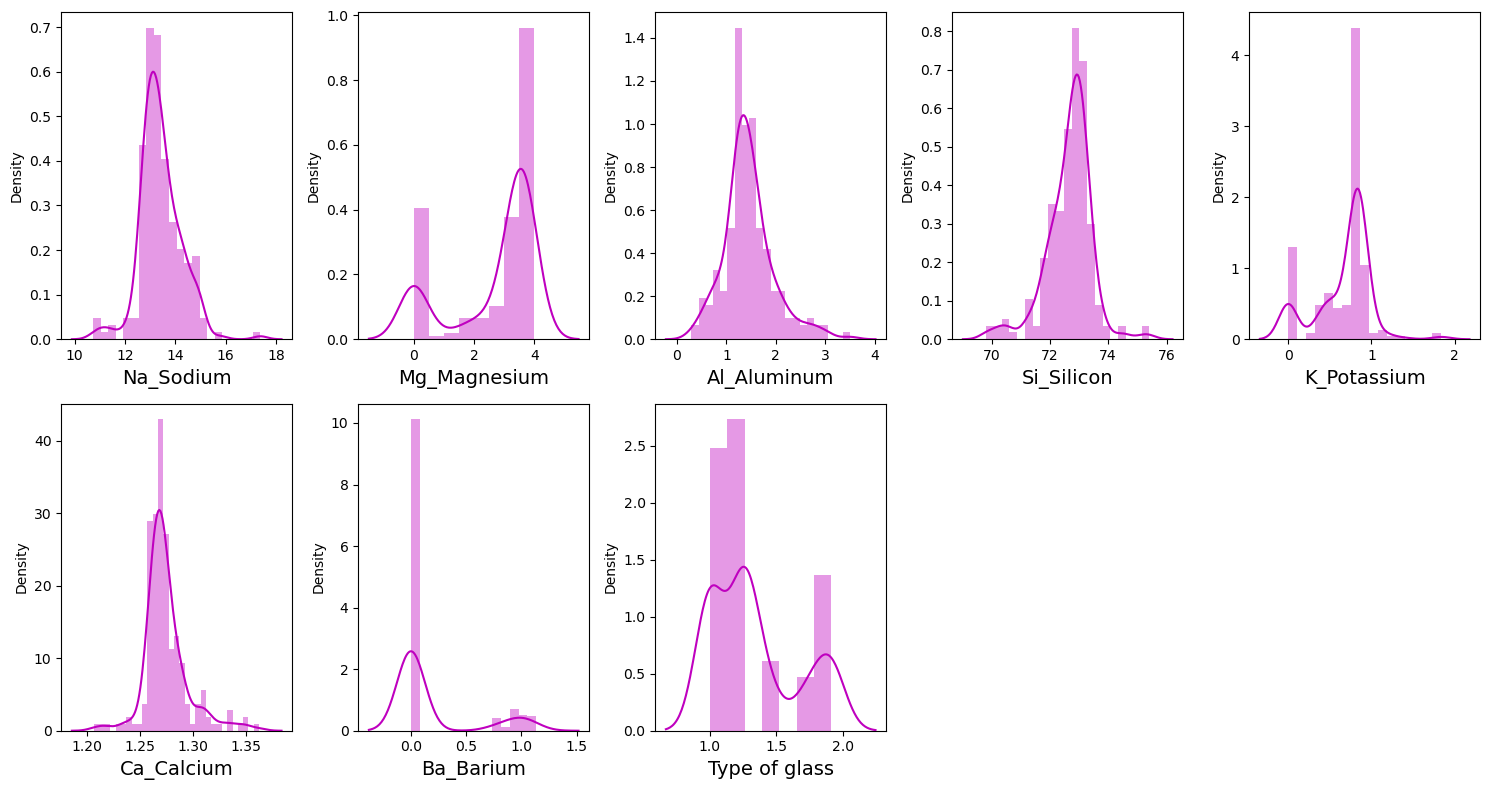

In [22]:
plt.figure(figsize=(15,8), facecolor= "white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

By using the distribution plot we are verify the skewness in the dataset, our data is skewed at some points which is representated with the help of distribution plot map

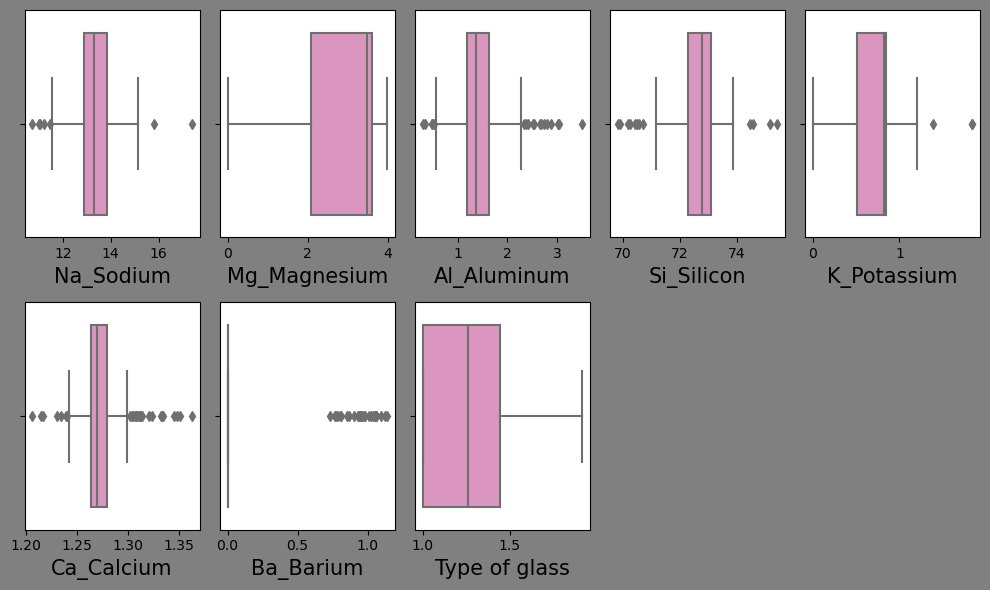

In [23]:
plt.figure(figsize=(10,6), facecolor= 'Grey')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

By using boxplot map we can verify the skewed dataset, our dataset is skewed at some points which is represented with the help of boxplot.

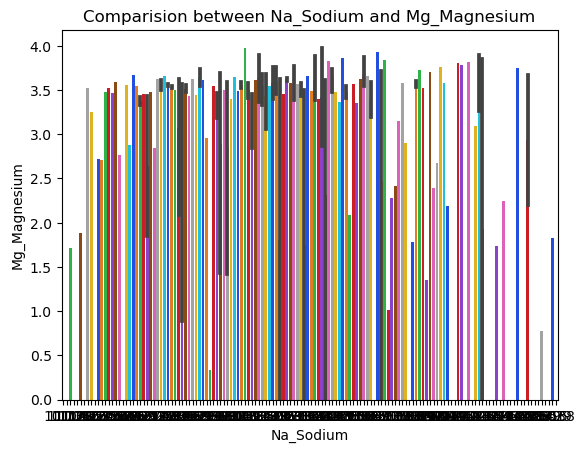

In [24]:
plt.title("Comparision between Na_Sodium and Mg_Magnesium")
sns.barplot(x='Na_Sodium', y='Mg_Magnesium', data=df, palette= 'bright')
plt.show()

By using barplot we are doing the comparison between Na & Mg presents in our dataset for glass identification

In [25]:
cor= df.corr()
cor

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Type of glass
Na_Sodium,1.000000,-0.276486,0.157928,-0.068519,-0.539691,-0.261301,0.412172,0.458070
Mg_Magnesium,-0.276486,1.000000,-0.480035,-0.160359,0.450819,-0.417164,-0.524242,-0.725009
Al_Aluminum,0.157928,-0.480035,1.000000,-0.009226,0.063710,-0.282743,0.551506,0.590200
Si_Silicon,-0.068519,-0.160359,-0.009226,1.000000,-0.177299,-0.184604,0.025388,0.125173
K_Potassium,-0.539691,0.450819,0.063710,-0.177299,1.000000,-0.358939,-0.350595,-0.397229
Ca_Calcium,-0.261301,-0.417164,-0.282743,-0.184604,-0.358939,1.000000,-0.143429,0.005677
Ba_Barium,0.412172,-0.524242,0.551506,0.025388,-0.350595,-0.143429,1.000000,0.586872
Type of glass,0.458070,-0.725009,0.590200,0.125173,-0.397229,0.005677,0.586872,1.000000


We are finding the corelation between the components present in dataset

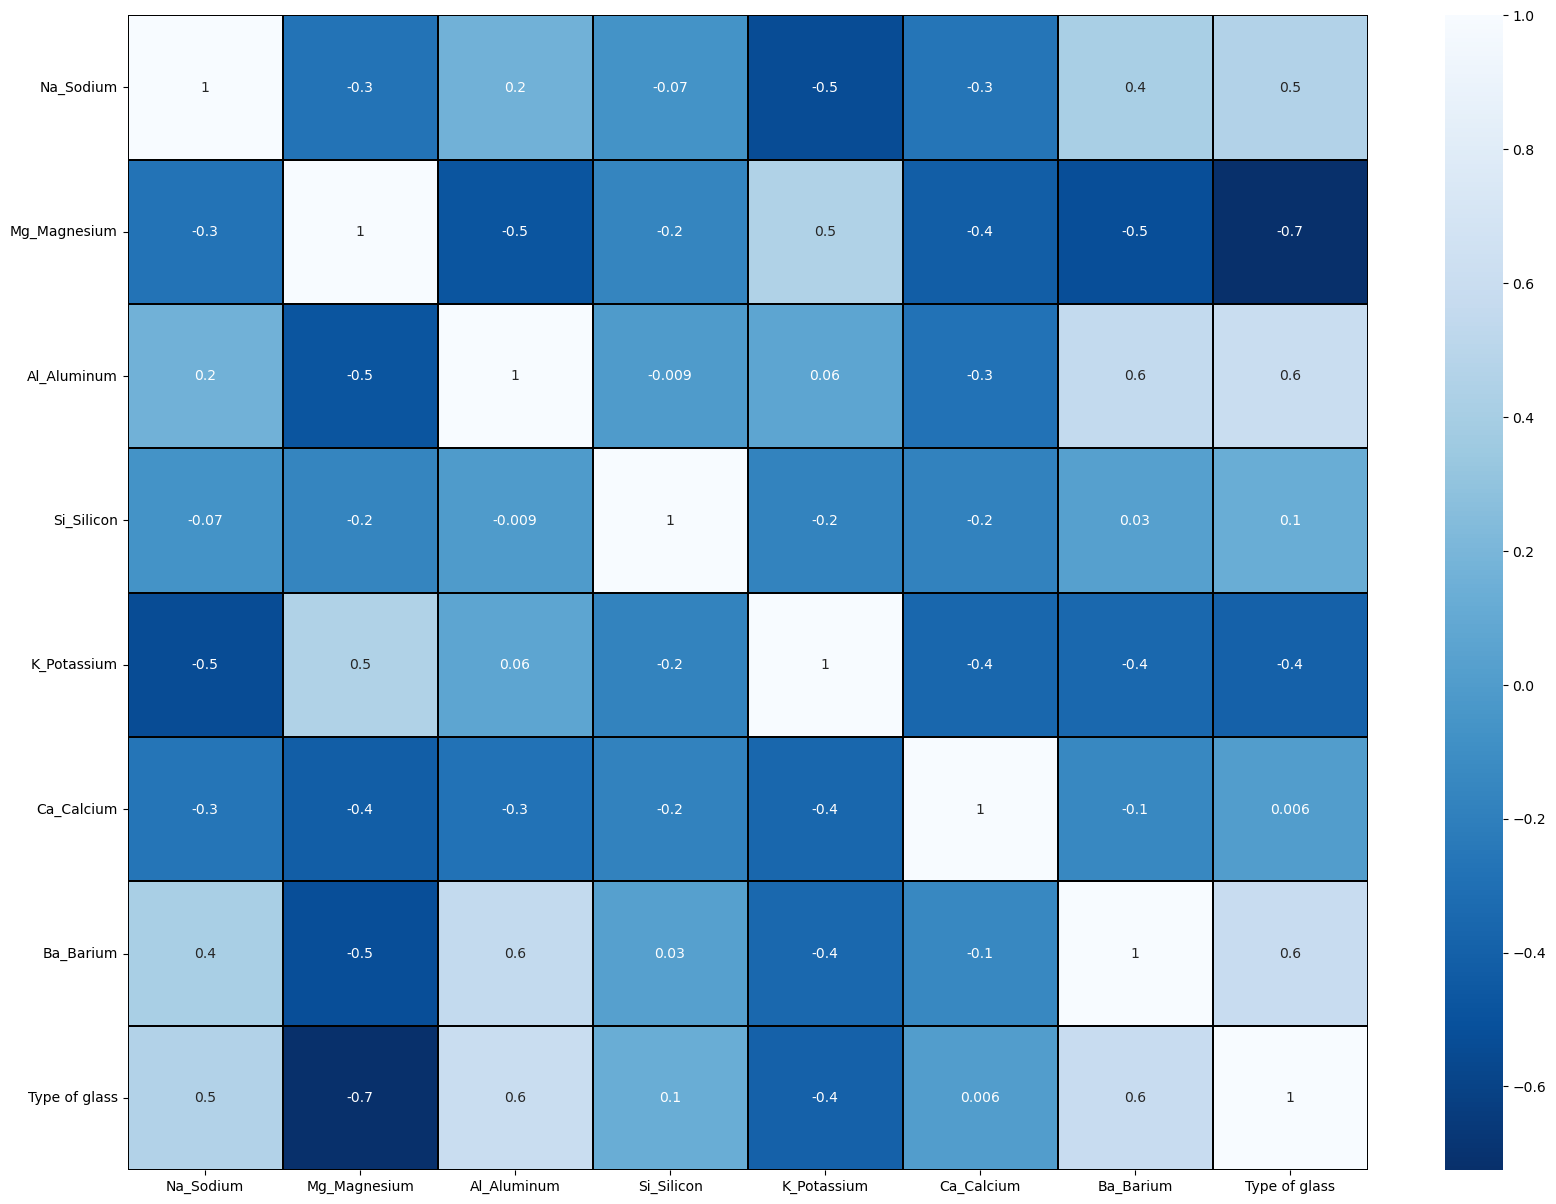

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

By using this heatmap plot we can see that Type of glass component have more correlation between barium and aluminum

In [27]:
x=df.drop("Type of glass", axis=1)
y=df["Type of glass"]

Here we are defing the target variable in y axis

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium
0,0.591880,0.642937,-0.173500,0.097091,0.342041,-0.852460,-0.462443
1,0.150946,0.608144,0.187433,0.433777,0.184051,-0.895914,-0.462443
2,-0.240996,0.705564,-0.313863,-0.058303,0.481328,-0.521738,-0.462443
3,-0.167507,0.656854,-0.414122,0.550322,0.451717,-0.647254,-0.462443
4,-0.755419,0.649895,0.347848,0.407878,0.579815,-0.647254,-0.462443
...,...,...,...,...,...,...,...
208,0.898085,-1.862164,2.874379,-0.058303,-0.720352,0.236475,2.257625
209,1.853443,-1.862164,1.089766,0.524423,-2.020518,-0.373779,2.382971
210,1.167545,-1.862164,1.149921,0.990604,-2.020518,-0.341282,2.392777
211,1.192041,-1.862164,0.989506,1.236644,-2.020518,-0.308922,2.378972


Here we will import the required library for building the model

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

We will classify the data as x axis and y axis, y axis shows the target varibale

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Here we are building the model by using the linear regression

In [31]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.037574675342203274
R-squared (R2) Score: 0.6808179194221491


Required coding for building the model linear regression

In [33]:
import joblib
joblib.dump(model,"Type of glass.pkl")

['Type of glass.pkl']

Need to import joblib liabrary

In [36]:
model = joblib.load("Type of glass.pkl")
prediction = model.predict(X_test)
prediction

array([1.19936554, 1.98037718, 1.07030775, 1.98872908, 1.22585437,
       1.33499615, 1.07844089, 1.24047022, 1.24184074, 1.11664297,
       1.52755763, 1.84565847, 1.19137572, 1.20696843, 1.55438214,
       1.54718554, 2.01146953, 1.24370319, 1.15322031, 1.4183215 ,
       1.24768817, 2.0059973 , 1.91772544, 1.88497648, 1.11637256,
       1.446488  , 1.10749454, 1.20235566, 1.50588662, 1.17818783,
       1.12371642, 1.21977907, 1.28283047, 1.19196088, 1.44778816,
       1.94965386, 1.83669129, 1.18696564, 1.27198728, 1.23372595,
       1.0930349 , 1.30417316, 1.29699933])

In [37]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,1.199366,1.000000
1,1.980377,1.912931
2,1.070308,1.000000
3,1.988729,1.912931
4,1.225854,1.259921
5,1.334996,1.259921
6,1.078441,1.000000
7,1.240470,1.259921
8,1.241841,1.259921
9,1.116643,1.259921


Finally we have predicted the type of glass components in the dataset. Predicted and original one is almost neaby which means our prediction is almost correct.